## Boxplot

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

### Connection to data

In [7]:
df = pd.read_csv('data/ab-test.csv')
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


In [8]:
control_before = df[(df['group'] == 'control') & (df['time'] == 'before')]['diff']
control_after = df[(df['group'] == 'control') & (df['time'] == 'after')]['diff']
test_before = df[(df['group'] == 'test') & (df['time'] == 'before')]['diff']
test_after = df[(df['group'] == 'test') & (df['time'] == 'after')]['diff']

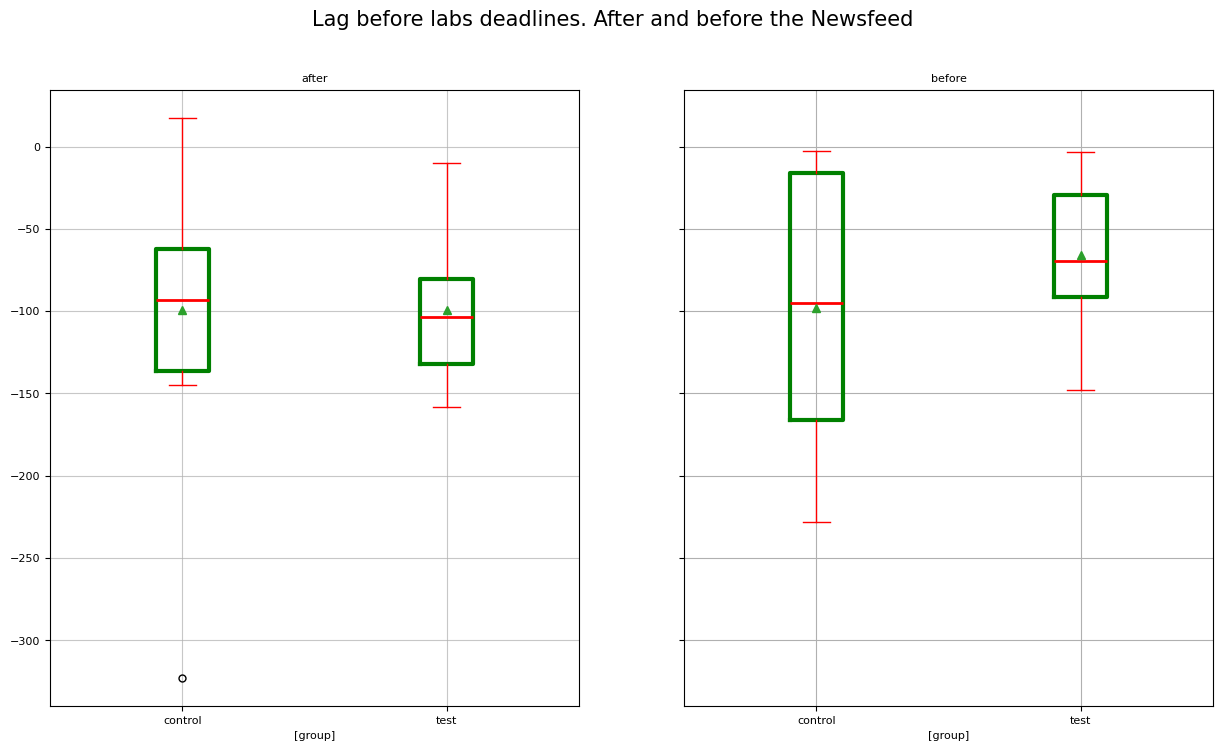

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8), sharey=True)

ax1.boxplot([control_after, test_after], widths=0.2,
                        boxprops=dict(linewidth=3, color='green'), # IQR
                        medianprops=dict(linewidth=2, color='red'), # Median
                        whiskerprops=dict(linewidth=1, color='red'), # Whiskers, box linyasi
                        capprops=dict(linewidth=1, color='red'), # Caps
                        flierprops=dict(marker='o', color='red', markersize=5),  # Outliers
                        showmeans=True)


ax1.set_xticks([1, 2])
ax1.set_xticklabels(['control', 'test'], fontsize=8)
ax1.set_title('after', fontsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.grid(True, alpha=0.7)

ax2.boxplot([control_before, test_before], widths=0.2,
                         boxprops=dict(linewidth=3, color='green'),
                         medianprops=dict(linewidth=2, color='red'),
                         whiskerprops=dict(linewidth=1, color='red'),
                         capprops=dict(linewidth=1, color='red'),
                         flierprops=dict(marker='o', color='red', markersize=50),
                         showmeans=True)  

ax2.set_xticks([1, 2])
ax2.set_xticklabels(['control', 'test'], fontsize=8)
ax2.set_title('before', fontsize=8)
ax2.tick_params(axis='y', labelsize=8) 
ax2.grid(True)

ax1.set_xlabel('[group]', fontsize=8)
ax2.set_xlabel('[group]', fontsize=8)
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)
plt.show()

     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR

## Answer the question

In [10]:
q1 = control_before.quantile(0.25)  # -166.25
q3 = control_before.quantile(0.75)  # -16.25
iqr = q3 - q1  # 150.0
rounded_iqr = round(iqr, -1) # 10 ga yaxlitlash: Example: 71.25 -> 70
rounded_iqr

np.float64(150.0)

### The IQR of the control group before the newsfeed is `150`